# Data Analyses of Iris and Laptop Prices Dataset

#### This notebook provides initial exploratory data analysis of both the Iris and Laptop prices dataset. Insights from this notebook may be used for market analysis and machine learning development. Follow along by running the cells below, or jump to relevant sections of the notebook.

## Import libraries

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## The Iris Dataset and Bivariate Statistics

The Iris Dataset features structured, numerical attributes of Iris flower samples. We can use bivariate statistics to see how features relate with one another, namely covariance and correlation.

Covariance is a measure of how two variables vary with each other. Meanwhile, correlation is a special form of covariance in that it is its normalized form. To illustrate, consider the equation for covariance:

$$
\text{Cov}(X,Y) = \frac{\sum_{i=1}^{n} (X_i - \mu_x)(Y_i - \mu_y)}{n}
$$

Covariance indicates the direction of the relationship between X and Y. A positive covariance implies that X and Y increase or decrease together, while a negative covariance suggests that as one variable increases, the other decreases. However, covariance cannot tell us the strength of the relationship, a quality which is better captured by correlation, as given below:

$$
\text{Correlation}(X,Y) = \frac{\text{Cov}(X,Y)}{\sigma_x \sigma_y}
$$

Let us use these equations for bivariate analysis of the flower data.

### Load and inspect Iris dataset.

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Define utility functions for covariance and correlation.

In [3]:
def calcCov(x, y):
    return (np.sum((x-np.mean(x))*(y-np.mean(y))))/(x.shape[0]-1)

def covMat(data):
    cov_mat = np.zeros(shape=(data.shape[1], data.shape[1]))
    for i, colX in enumerate(data.T):
        for j, colY in enumerate(data.T):
            cov_mat[i, j] = calcCov(colX, colY)
            if i!=j: cov_mat[j, i] = cov_mat[i, j]
        if i == len(data.T)//2+1: break
    return cov_mat

def corrMat(data):
    cov_mat = covMat(data)
    joint_stdevs = np.zeros(shape=(data.shape[1], data.shape[1])) # Store all joint stdevs for efficient vectorization, rather than dividing each element by each joint stsdev
    for i, colX in enumerate(data.T):
        for j, colY in enumerate(data.T):
            joint_stdevs[i, j] = np.std(colX, ddof=1) * np.std(colY, ddof=1) 
            if i!=j: joint_stdevs[j, i] = joint_stdevs[i, j]
        if i == len(data.T)//2+1: break
    corr_mat = cov_mat/joint_stdevs
    return corr_mat

def generateBivariateHeatmap(fig, axis, matrix, features, title='correlation', cmap='viridis'):
    im = axis.imshow(matrix, cmap=cmap)
    axis.set_title(title)

    axis.set_xticks(range(len(iris.feature_names)), labels=iris.feature_names,
                rotation=45, ha="right", rotation_mode="anchor")
    axis.set_yticks(range(len(iris.feature_names)), labels=iris.feature_names)

    for i in range(len(iris.feature_names)):
        for j in range(len(iris.feature_names)):
            axis.text(j, i, round(matrix[i][j], 2),
                    ha="center", va="center", color="black",
                    bbox={'facecolor': 'lightgrey', 'alpha': 0.5, 
                          'edgecolor': 'none', 'boxstyle': 'round,pad=0.3'})    
    fig.colorbar(im, ax=axis, orientation='vertical', shrink=0.6)



### Verify correctness of custom functions.

In [4]:

assert np.allclose(covMat(iris.data), np.cov(iris.data, rowvar=False), atol=1e-10), "❌ Covariance matrix does NOT match!"
print("✅ Covariance matrices match!")

assert np.allclose(corrMat(iris.data), np.corrcoef(iris.data, rowvar=False), atol=1e-10), "❌ Correlation matrix does NOT match!"
print("✅ Correlation matrices match!")


✅ Covariance matrices match!
✅ Correlation matrices match!


### Visualize results of covariance and correlation.

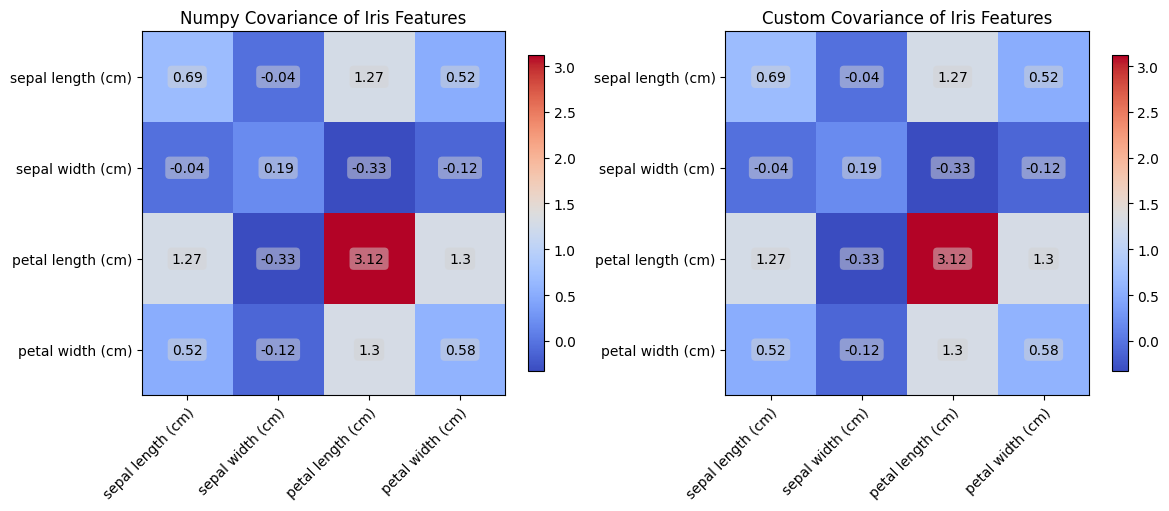

In [5]:
np_covmat, custom_covmat = np.cov(iris.data, rowvar=False), covMat(iris.data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

generateBivariateHeatmap(fig, axes[0], np_covmat, iris.feature_names, title='Numpy Covariance of Iris Features', cmap='coolwarm')
generateBivariateHeatmap(fig, axes[1], custom_covmat, iris.feature_names, title='Custom Covariance of Iris Features', cmap='coolwarm')

plt.tight_layout()

plt.show()

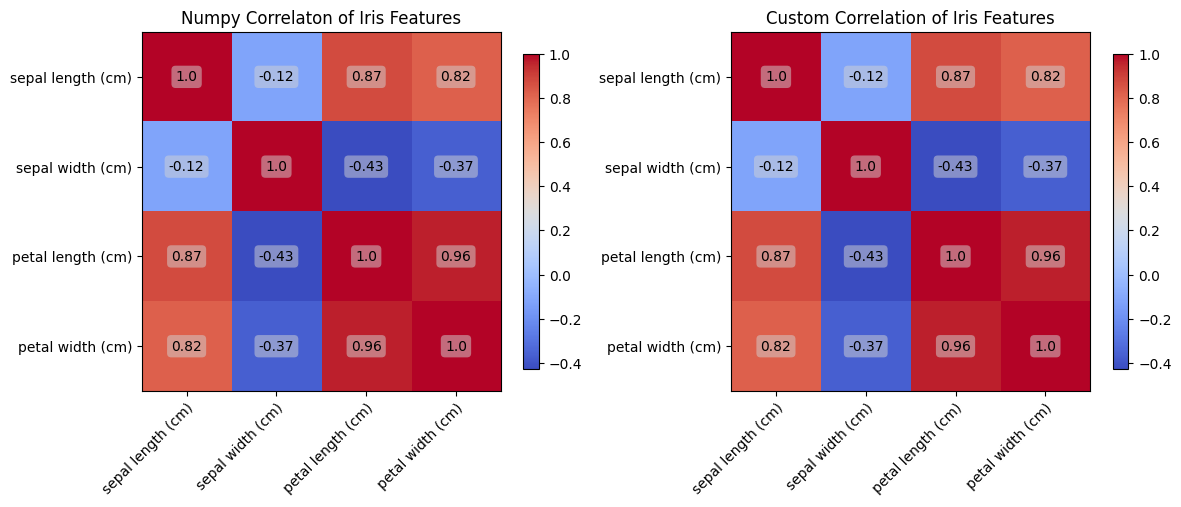

In [6]:
np_corrmat, custom_corrmat = np.corrcoef(iris.data, rowvar=False), corrMat(iris.data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

generateBivariateHeatmap(fig, axes[0], np_corrmat, iris.feature_names, title='Numpy Correlaton of Iris Features', cmap='coolwarm')
generateBivariateHeatmap(fig, axes[1], custom_corrmat, iris.feature_names, title='Custom Correlation of Iris Features', cmap='coolwarm')

plt.tight_layout()

plt.show()

## Exploratory Data Analysis of the Laptop Prices Dataset

The laptop prices dataset contains structured data about laptops including hardware design, specifications, and price. Visualizing features in this dataset may yield insights for market analyis and machine learning development.

### Load laptop prices dataset.

In [7]:
df = pd.read_csv('laptop_price - dataset.csv')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


### Inspect and rename columns for easier reference.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [9]:
df = df.rename(columns={'CPU_Frequency (GHz)': 'CPU_Frequency', 'RAM (GB)': 'RAM', 'Weight (kg)': 'Weight', 'Price (Euro)': 'Price'})


### Plot the price of all laptops.

Text(0, 0.5, 'Frequency')

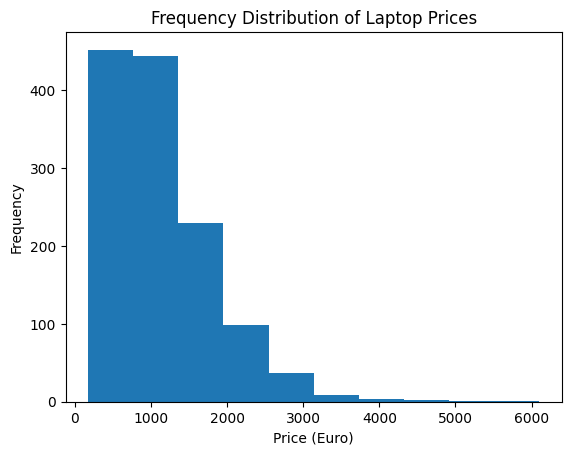

In [10]:
plt.hist(df['Price'], )
plt.title("Frequency Distribution of Laptop Prices")
plt.xlabel("Price (Euro)")
plt.ylabel("Frequency")

 _The laptop prices appear skewed to the right, i.e., there are more cheaply-priced laptops than expensive ones._

### Average Price of Laptops per Company

In [11]:
average_prices_per_company = df.groupby('Company').agg(mean_price = ('Price', 'mean')).reset_index()
average_prices_per_company

,Company,mean_price
0,Acer,633.464455
1,Apple,1564.198571
2,Asus,1123.829737
3,Chuwi,314.296667
4,Dell,1199.225120
5,Fujitsu,729.000000
6,Google,1677.666667
7,HP,1080.314664
8,Huawei,1424.000000
9,LG,2099.000000


In [12]:
company_with_highest_mean_price = average_prices_per_company.loc[average_prices_per_company['mean_price'].idxmax()]['Company']
print(f"On average, the company with the highest laptop price is {company_with_highest_mean_price}.")

On average, the company with the highest laptop price is Razer.


_It makes sense that Razer has on average, the most expensive laptop model as it sells gaming laptops._

### Unique Operating System vs. Price

We see below that we can merge some of the operating systems if we do not care about their versions. Let's rename then accordingly.

In [13]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [14]:
macOS_STR = "macOS"
win_STR = "Windows"

dict = {"Mac OS X" : macOS_STR,"Windows 10" : win_STR, "Windows 7": win_STR, "Windows 10 S": win_STR }
df = df.replace({"OpSys": dict})

In [15]:
print(f"The unique operating systems are listed as follows: {df['OpSys'].unique()}")

The unique operating systems are listed as follows: ['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


Now, let's plot how the distribution of prices compare across operating systems.

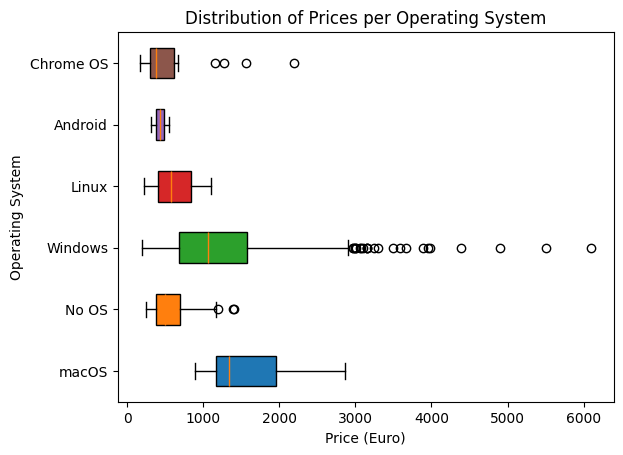

In [16]:
fig, ax = plt.subplots()
ax.set_ylabel('Operating System')
ax.set_xlabel('Price (Euro)')

bplot = ax.boxplot([df[df['OpSys'] == company]['Price'] for company in df['OpSys'].unique()],
                   patch_artist=True, 
                   tick_labels=df['OpSys'].unique(), vert=False)  

for patch, color in zip(bplot['boxes'], plt.cm.tab10.colors[:len(df['OpSys'])]):
    patch.set_facecolor(color)

plt.title('Distribution of Prices per Operating System') 
plt.show()

_Windows has the most spread-out and highest prices while Android has the least spread-out prices._

### RAM vs Price

RAM is commonly found to be a deciding factor on the price of a laptop. Let's quantify this relationship thru a correlation.

Text(0.5, 1.0, "RAM vs Price with Pearson's Correlation")

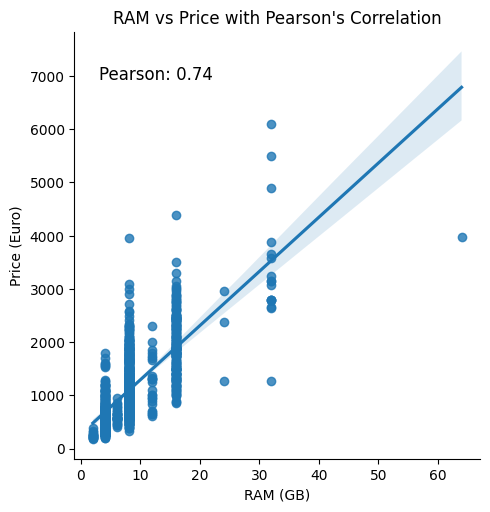

In [17]:
g = sns.lmplot(x='RAM', y='Price', data=df)

correlation, _ = stats.pearsonr(df['RAM'], df['Price'])

g.ax.text(0.2, 0.9, f'Pearson: {correlation:.2f}', 
          ha='center', 
          va='center', 
          transform=g.ax.transAxes, 
          fontsize=12)

g.ax.set_xlabel('RAM (GB)')
g.ax.set_ylabel('Price (Euro)')

g.ax.set_title("RAM vs Price with Pearson's Correlation")

_There is a strong positive linear relationship between price and RAM (r=0.74)._

### Feature engineering: Storage type

We can creating a new feature 'Storage type' by extracting storage types from the Memory column. This might be useful if we want to train ML models later on.

In [18]:
def extract_storage_type(mem):
    storage_types = ['SSD', 'HDD', 'Flash Storage', 'Hybrid']
    storage_types_in_mem = [storage_type for storage_type in storage_types if storage_type in mem]
    str_storage = str(storage_types_in_mem)[1:-1].replace(', ', '+').replace("'","")
    return str_storage

In [19]:
df["Storage type"] = df["Memory"].apply(extract_storage_type)
print(f"The unique storage types are as follows: {df['Storage type'].unique()})")


The unique storage types are as follows: ['SSD' 'Flash Storage' 'HDD' 'SSD+HDD' 'Hybrid' 'HDD+Flash Storage'
 'SSD+Hybrid'])


### Freestyle Questions. Let's ask other interesting questions about the data.

| Question | Analysis and Visualization|
|----------|----------|
| 1. What are the clustering patterns we might observe in the relationship between weight and price? | K-means clustering & Scatter plot to visulize clusters|
| 2. What is the distribution of weights among companies? | Multi-box plot or multi-colored histogram |
| 3. Are there any outliers in the weight of laptops? Are there extremely heavy and extremely light laptops relative to average? | Multi-box plot |
| 4. What is the relationship between CPU frequency and RAM? | Correlation and Linear Model Plot|
| 5. What is the proportion of each type of operating system | Pie Chart |

### _What are the clustering patterns we might observe in the relationship between weight and price?_

We can use K-means clustering to find relevant clusters in the data. First, we normalize weight and price so that the range of values will not impact the distance calculation.

In [20]:
data_points = np.array(list(zip(df['Weight'], df['Price'])))
normalized_data_points = StandardScaler().fit_transform(data_points)

Let's run the K-means clustering algorithm on different values of k clusters and find the most optimal k. To do so, we use the elbow method, where the "elbow" refers to the point at which the inertia (a measure of compactness) starts to decrease at a slower rate. This indicates a good balance between the number of clusters and the compactness of the clusters.

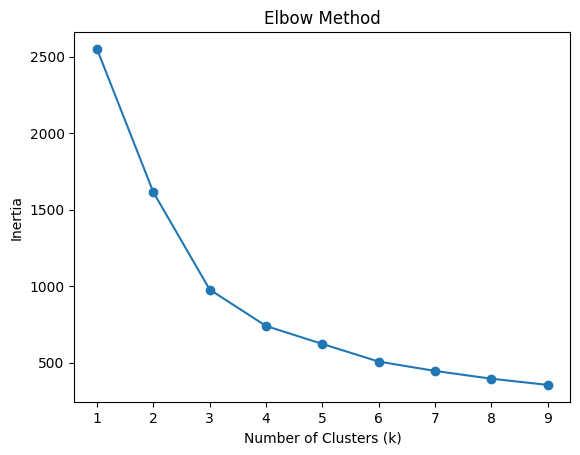

In [21]:
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(normalized_data_points)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

_4 appears to be the elbow point as the rate of decrease appears most slowly there. Let's visualize the results at k=4, then._ 

Cluster Centers: [[-0.11924833 -0.7042329 ]
 [-0.9249414   0.76571238]
 [ 0.89292068  0.2333279 ]
 [ 2.90765836  2.49340103]]
Labels: [1 0 0 ... 0 0 0]


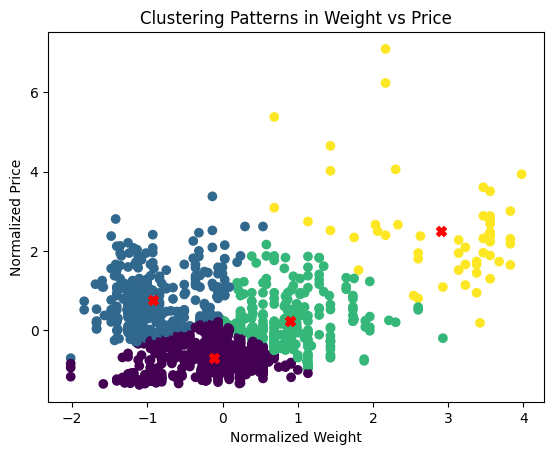

In [22]:
import numpy as np
import matplotlib.pyplot as plt

k = 4

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(normalized_data_points)

print("Cluster Centers:", kmeans.cluster_centers_)
print("Labels:", kmeans.labels_)
plt.title("Clustering Patterns in Weight vs Price")
plt.xlabel("Normalized Weight")
plt.ylabel("Normalized Price")

plt.scatter(normalized_data_points[:, 0], normalized_data_points[:, 1], c=kmeans.labels_, cmap='viridis')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', marker='X')  # Centroids
plt.show()


Above we see 4 clusters:
1. Lightweight budget laptops (Purple): laptops which have low weight and low price
2. Midrange lightweight laptops (Light blue): laptops which are lighter but relatively expensive, prioritizing smaller form factor and design
3. Balanced weight and price (Light green): laptops with average price and weight for standard applications
4. Heavyweight workhorse laptops (Yellow): Heavy, expensive Laptops which might need significant graphics and computational resources for gaming, programming, video editing, etc.

Such clusters may be helpful attributes in market analysis especially if a company wants to cater their laptops to some market with different preferences for price and form factor.

### _What is the distribution of laptop weights among companies?_

Let's use a multi-box plot to observe the distribution of laptop weights among companies.

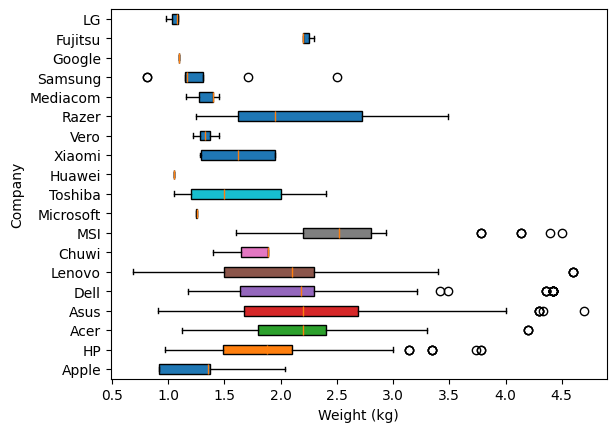

In [23]:
fig, ax = plt.subplots()
ax.set_ylabel('Company')
ax.set_xlabel('Weight (kg)')
bplot = ax.boxplot([df[df['Company'] == company]['Weight'] for company in df['Company'].unique()],
                   patch_artist=True, 
                   tick_labels=df['Company'].unique(), vert=False)  

for patch, color in zip(bplot['boxes'], plt.cm.tab10.colors[:len(df['Company'])]):
    patch.set_facecolor(color)

plt.show()

_As we can see, Asus has the most spread-out laptop weights, indicating that they offer both lightweight and heavyweight workhorse laptops. Meanwhile, Google, Microsoft, and Huawei have the least spread out weights, at the lower end of the scale, as they focus on technologies beyond laptops and may not have resources to invest in a wider-range development._